## Question 1 :

A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.

H0 : mean of both sample is equal 

In [1]:
# H0 : mu_d1 = mu_d2
# H1 : mu_d1 != mu_d2
# alpha = 0.05
# p-value < alpha : reject H0

import scipy 
import numpy as np 
import pandas as pd 

data = pd.read_csv('Cutlets.csv')
data


,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


In [2]:
data.isnull().sum()

Unit A    0
Unit B    0
dtype: int64

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 692.0 bytes


<AxesSubplot: xlabel='Unit A', ylabel='Density'>

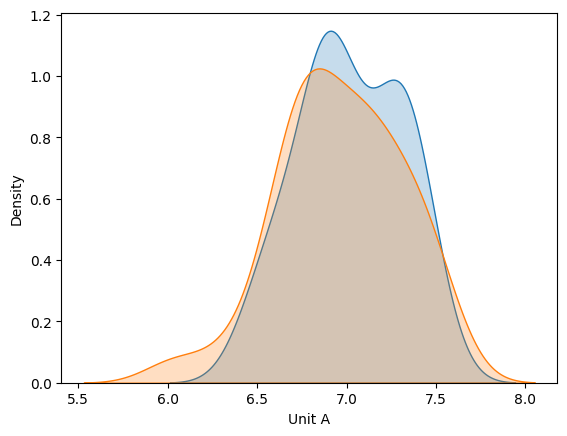

In [4]:
import seaborn as sns
sns.kdeplot(data=data, x = 'Unit A', fill=True)
sns.kdeplot(data=data, x = 'Unit B', fill=True)

In [6]:
scipy.stats.ttest_ind(data['Unit A'],data['Unit B'])
p_value = scipy.stats.ttest_ind(data['Unit A'],data['Unit B'])[1]
p_value

0.47223947245995

In [7]:
alpha = 0.05
if p_value <= alpha:
    print("We reject null hypothesis")
else:
    print("We cannot reject null hypothesis")

We cannot reject null hypothesis


## Question 2 :

A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% signicance level.

Null hypothesis : All samples have same mean.

In [10]:
import numpy as np 
import pandas as pd 
import scipy.stats as stats

data = pd.read_csv('LabTAT.csv')
data

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


<AxesSubplot: xlabel='Laboratory 1', ylabel='Density'>

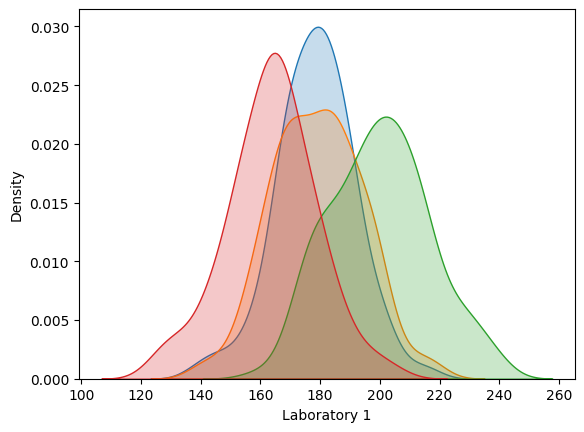

In [11]:
import seaborn as sns
sns.kdeplot(data=data, x ='Laboratory 1', fill=True)
sns.kdeplot(data=data, x ='Laboratory 2', fill=True)
sns.kdeplot(data=data, x ='Laboratory 3', fill=True)
sns.kdeplot(data=data, x ='Laboratory 4', fill=True)

In [12]:
test_statistic , p_value = stats.f_oneway(data.iloc[:,0],data.iloc[:,1],data.iloc[:,2],data.iloc[:,3])
print('p_value =',p_value)

p_value = 2.1156708949992414e-57


In [13]:
alpha = 0.05
if p_value <= alpha:
    print("We reject null hypothesis")
else:
    print("We cannot reject null hypothesis")

We reject null hypothesis


## Question 3 :

Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.

Null Hypothesis : All proportions are equal

In [14]:
import scipy 
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 

data = pd.read_csv('BuyerRatio.csv',index_col=0)
data

,East,West,North,South
Observed Values,,,,
Males,50,142,131,70
Females,435,1523,1356,750



Applying Chi-Square $\chi_2$ contingency table to convert observed value into expected value

In [15]:
stat, p, dof, exp = stats.chi2_contingency(data) 

In [16]:
print(f"stat : {stat}")
print(f"p : {p}")
print(f"dof : {dof}")
print(f"exp : {exp}")

stat : 1.595945538661058
p : 0.6603094907091882
dof : 3
exp : [[  42.76531299  146.81287862  131.11756787   72.30424052]
 [ 442.23468701 1518.18712138 1355.88243213  747.69575948]]


In [17]:
observed = data.values.reshape(1,-1)[0]
observed

array([  50,  142,  131,   70,  435, 1523, 1356,  750], dtype=int64)

In [18]:
expected = exp.reshape(1,-1)[0]
expected

array([  42.76531299,  146.81287862,  131.11756787,   72.30424052,
        442.23468701, 1518.18712138, 1355.88243213,  747.69575948])

In [19]:
statistics, p_value = stats.chisquare(observed,expected,ddof=dof)
print(f"statistics :{statistics}")
print(f"p-value : {p_value}")

statistics :1.595945538661058
p-value : 0.8095206647678864


In [20]:
alpha = 0.05
if p_value <= alpha:
    print("We reject null hypothesis")
else:
    print("We cannot reject null hypothesis")


We cannot reject null hypothesis


## Question 4 :

TeleCalls uses 4 centers around the globe to process customer order forms. They audit a certain % of the customer order forms. Any error in order form renders it defective and has to be reworked before processing. The manager wants to check whether the defective % varies by center. Please analyze the data at 5% sigificance level and help the manage draw appropriate inferences.

Null Hypothesis : The defective % do not vary with center.

In [21]:
data = pd.read_csv('Costomer+OrderForm.csv')
data.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [22]:
df = data.melt().value_counts().rename_axis(['centers','defect_type']).reset_index(name='counts')
df

,centers,defect_type,counts
0,India,Error Free,280
1,Phillippines,Error Free,271
2,Malta,Error Free,269
3,Indonesia,Error Free,267
4,Indonesia,Defective,33
5,Malta,Defective,31
6,Phillippines,Defective,29
7,India,Defective,20


In [23]:
df_pivot = df.pivot(index='defect_type',columns='centers',values='counts')
df_pivot

centers,India,Indonesia,Malta,Phillippines
defect_type,,,,
Defective,20,33,31,29
Error Free,280,267,269,271


In [24]:
stat, p, dof, exp = stats.chi2_contingency(df_pivot) 
print(f"stat : {stat}")
print(f"p : {p}")
print(f"dof : {dof}")
print(f"exp : {exp}")

stat : 3.858960685820355
p : 0.2771020991233135
dof : 3
exp : [[ 28.25  28.25  28.25  28.25]
 [271.75 271.75 271.75 271.75]]


In [25]:
observed = df_pivot.values.reshape(1,-1)[0]
observed

array([ 20,  33,  31,  29, 280, 267, 269, 271], dtype=int64)

In [26]:
expected = exp.reshape(1,-1)[0]
expected

array([ 28.25,  28.25,  28.25,  28.25, 271.75, 271.75, 271.75, 271.75])

In [27]:
statistics, p_value = stats.chisquare(observed,expected,ddof=dof)
print(f"statistics :{statistics}")
print(f"p-value : {p_value}")

statistics :3.858960685820355
p-value : 0.4254298144535761


In [28]:
alpha = 0.05
if p_value <= alpha:
    print("We reject null hypothesis")
else:
    print("We cannot reject null hypothesis")

We cannot reject null hypothesis
